In [1]:
from intervals.number import Interval as I
from intervals.methods import (lo,hi,mid,rad,width,straddle_zero,intervalise)
from tests.interval_generator import pick_endpoints_at_random_uniform

In [2]:
x=I(1,2)
print(x)

[1.0,2.0]


In [3]:
y=I(-3,-2)
print(y)

[-3.0,-2.0]


In [6]:
print(x+y)
print(x-y)
print(x*y)
print(x/y)

[-2.0,0.0]
[3.0,5.0]
[-6.0,-2.0]
[-1.0,-0.3333333333333333]


In [8]:
xe = [lo(x),hi(x)]
ye = [lo(y),hi(y)]
xye= [xx+yy for xx in xe for yy in ye ]
print(min(xye))
print(max(xye))

-2.0
0.0


In [4]:
x.scalar

True

In [5]:
x.shape

()

In [12]:
len(x)

0

In [9]:
x_ = I([1],[2])

In [10]:
x_.scalar # (0) scalar

True

In [11]:
x_[0] # (1) indexable

[1.0,2.0]

In [13]:
for xi in x: # (2) iterable
    print(x)

[1.0,2.0]


In [14]:
len(x_) # (3) sized

1

## Arithmetic between array-like intervals

In [2]:
x = I(lo=[1,2,3,4],hi=[2,3,4,5])
print(x)
print('---')
y = I(lo=[-1,-2,-3,-4],hi=[-1,-1,-1,-1])
print(y)

[1.0,2.0]
[2.0,3.0]
[3.0,4.0]
[4.0,5.0]
---
[-1.0,-1.0]
[-2.0,-1.0]
[-3.0,-1.0]
[-4.0,-1.0]


In [3]:
print(x+y)
print('---')
print(x-y)
print('---')
print(x*y)
print('---')
print(x/y)

[0.0,1.0]
[0.0,2.0]
[0.0,3.0]
[0.0,4.0]
---
[2.0,3.0]
[3.0,5.0]
[4.0,7.0]
[5.0,9.0]
---
[-2.0,-1.0]
[-6.0,-2.0]
[-12.0,-3.0]
[-20.0,-4.0]
---
[-2.0,-1.0]
[-3.0,-1.0]
[-4.0,-1.0]
[-5.0,-1.0]


In [4]:
for xi,yi in zip(x,y): print(xi-yi)

[2.0,3.0]
[3.0,5.0]
[4.0,7.0]
[5.0,9.0]


In [3]:
a = I(-1,1)

In [4]:
print(a+x)
print('--')
print(a-x)
print('--')
print(a*x)
print('--')
print(a/x)

[0.0,3.0]
[1.0,4.0]
[2.0,5.0]
[3.0,6.0]
--
[-3.0,0.0]
[-4.0,-1.0]
[-5.0,-2.0]
[-6.0,-3.0]
--
[-2.0,2.0]
[-3.0,3.0]
[-4.0,4.0]
[-5.0,5.0]
--
[-1.0,1.0]
[-0.5,0.5]
[-0.3333333333333333,0.3333333333333333]
[-0.25,0.25]


In [43]:
ds = [[[1,2],[2,3],[4,5]],
      [[-1,2],[-2,1],[3,5]],
      [[0,2],[3,4],[6,8]]]

In [44]:
x = intervalise(ds)
print(x.shape)

(3, 3)


In [45]:
print(x)

[1. 2.] [-1.  2.] [0. 2.]
[2. 3.] [-2.  1.] [3. 4.]
[4. 5.] [3. 5.] [6. 8.]


In [39]:
ds = [[1,2],[2,3],[4,5],[5,6]]
x = intervalise(ds)
print(x.shape)

(4,)


In [40]:
print(x)

[1.0,2.0]
[2.0,3.0]
[4.0,5.0]
[5.0,6.0]


In [41]:
ds = [[1,2,4,5],[2,3,5,6]]
x = intervalise(ds)
print(x.shape)

(4,)


In [42]:
print(x)

[1.0,2.0]
[2.0,3.0]
[4.0,5.0]
[5.0,6.0]


## Speed test

In [1]:
from intervals.number import Interval as I
from intervals.methods import (lo,hi,mid,rad,width,intervalise)
from tests.interval_generator import pick_endpoints_at_random_uniform
import time

In [4]:
# Two large interval matrices
shape=(5_000,5_000)
t0 = time.time()
x = intervalise(pick_endpoints_at_random_uniform(shape=shape,left_bound=0,right_bound=1))
y = intervalise(pick_endpoints_at_random_uniform(shape=shape,left_bound=0,right_bound=1))
t1 = time.time()
print(t1-t0)

0.0032477378845214844


In [6]:
shape=(1000,1000)
t0 = time.time()
x = intervalise(pick_endpoints_at_random_uniform(shape=shape,left_bound=0,right_bound=1))
y = intervalise(pick_endpoints_at_random_uniform(shape=shape,left_bound=0,right_bound=1))
t1 = time.time()
print(t1-t0)
print('---')
t0 = time.time()
z=x*y
t1 = time.time()
print(t1-t0)
print('---')
t0 = time.time()
z_lo=x.lo*y.lo
t1 = time.time()
print(t1-t0)

0.12917399406433105
---
0.038453102111816406
---
0.0017631053924560547


In [7]:
shape=(10000,10000)
t0 = time.time()
x = intervalise(pick_endpoints_at_random_uniform(shape=shape,left_bound=0,right_bound=1))
y = intervalise(pick_endpoints_at_random_uniform(shape=shape,left_bound=0,right_bound=1))
t1 = time.time()
print(t1-t0)
print('---')
t0 = time.time()
z=x*y
t1 = time.time()
print(t1-t0)
print('---')
t0 = time.time()
z_lo=x.lo*y.lo
t1 = time.time()
print(t1-t0)

14.020300149917603
---
6.893776178359985
---
0.4369039535522461


In [ ]:
s = [100,500,1_000,5_000,10_000,20_000]
t_int=[0.0019979476928710938,0.007415771484375,0.038453102111816406,1.718714714050293,6.893776178359985,355.1633040904999]
t_arr=[0.000762939453125,0.0003352165222167969,0.0017631053924560547,0.13709092140197754,0.4369039535522461,37.13457989692688]


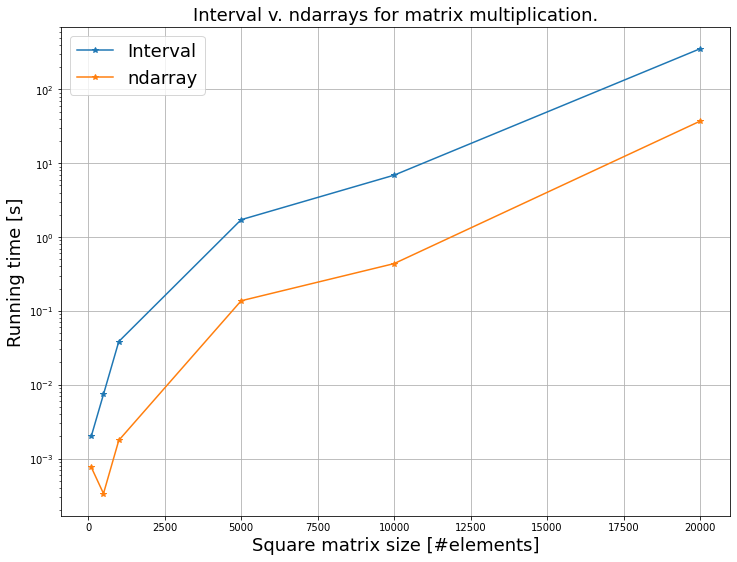

In [18]:
from matplotlib import pyplot
fig,ax = pyplot.subplots(figsize=(12,9))
ax.semilogy(s,t_int,label='Interval',marker='*')
ax.semilogy(s,t_arr, label='ndarray',marker='*')
ax.set_xlabel('Square matrix size [#elements]',fontsize=18)
ax.set_ylabel('Running time [s]',fontsize=18)
ax.set_title('Interval v. ndarrays for matrix multiplication.', fontsize=18)
ax.legend(fontsize=18)
ax.grid()